# Replication of Mackowiak, Matejka and Wiederholt (2018)

This example replicates [Mackowiak, Matejka and Wiederholt (2018)](https://www.sciencedirect.com/science/article/abs/pii/S002205311830139X) using the [DRIPs](https://github.com/afrouzi/DRIPs.jl) package.

See [Afrouzi and Yang (2020)](http://www.afrouzi.com/dynamic_inattention.pdf) for background on the theory.

## Contents
* Ex. 1: AR(2) Process
    * Initialization
    * Replication of Figures (2) and (3)
    * Measure Performance
* Ex. 2: AR(3) and ARMA(2,1) Processes
    * Solve and Measure Performance
    * Replication of Figure (5)
* Ex. 3: Price-setting with Rational Inattention
    * The Case with No Strategic Complementarity
    * The Case with Strategic Complementarity
    * Replication of Figure (6)
* Ex. 4: Business Cycle Model with News Shocks
    * Setup
    * Initialization
    * Solve and Measure Performance
    * Replication of Figure (7)

## Ex. 1: AR(2) Process
In this example, authors assume that the optimal action follows an AR(2) process,
$$
\begin{aligned}
    x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \theta_0 \varepsilon_t
\end{aligned}
$$
Then, we can write a state-space form as:
$$
\begin{aligned}
        \left[\begin{array}{c} x_t \\ x_{t-1} \end{array}\right]
        & =
       \underset{\mathbf{A}}{\underbrace{\left[\begin{array}{cc}
            \phi_1 & \phi_2 \\
            1 & 0\end{array}\right]}}\,
            \left[\begin{array}{c} x_{t-1} \\ x_{t-2} \end{array}\right]
        + \underset{\mathbf{Q}}{\underbrace{\left[\begin{array}{c}
            \theta_0 \\
            0\end{array}\right]}}\, \varepsilon_t
\end{aligned}
$$
We now characterize the optimal signal, $S_{t} = h_1 X_t + h_2 X_{t-1} + \psi_t$, as a function of $\phi_2$ and the capacity for information processing ($\kappa$).

### Initialization
Include the package:

In [1]:
using DRIPs, LinearAlgebra;

Assign value to deep parameters and define the structure of the problem

In [2]:
β   = 1.0   ; # Time preference
θ0  = 1.0   ;

ϕ2_seq  = 0:0.02:0.9        ;      # sequence of values for the AR(2) parameter
n_ϕ     = length(ϕ2_seq)    ;

κ_seq   = 0.008:0.01:3.5    ;      # sequence of values for the information processing capacity
n_κ     = length(κ_seq)     ;

H   = [1; 0]    ;
Q   = [θ0 ; 0]    ;

### Replication of Figures (2) and (3)
Solve for different values of $\phi_2$:

In [3]:
κ   = 0.2   ; # fix κ for this exercise so we can vary ϕ2

h1  = zeros(n_ϕ,1)    ;
h2  = zeros(n_ϕ,1)    ;
h2norm = zeros(n_ϕ,1) ;

for i in 1:n_ϕ
    ϕ2  = ϕ2_seq[i] ;
    ϕ1  = 0.9 - ϕ2 ;
    A   = [ϕ1 ϕ2 ; 1.0 0.0] ;

    ex1a = Drip(κ,β,A,Q,H,fcap=true);

    h1[i] = ex1a.ss.Y[1]
    h2[i] = ex1a.ss.Y[2]
    h2norm[i] = ex1a.ss.Y[2]/ex1a.ss.Y[1] # normalize the first signal weight h1 to one
end

Here is the replication of Figure (2):

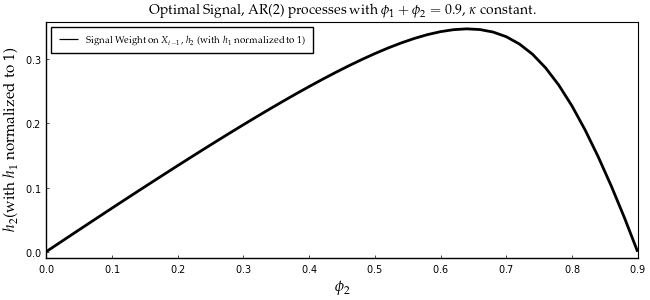

In [4]:
using Printf, LaTeXStrings, Plots; pyplot();
plot(ϕ2_seq,h2norm[:,1],
    title       = L"Optimal Signal, AR(2) processes with $\phi_1 + \phi_2 = 0.9$, $\kappa$ constant.",
    xlabel      = L"$\phi_2$",
    ylabel      = L"$h_2$(with $h_1$ normalized to 1)",
    label       = L"Signal Weight on $X_{t-1}$, $h_2$ (with $h_1$ normalized to 1)",
    legend      = :topleft,
    lw          = 2,
    color       = :black,
    xlim        = (0,0.9),
    xticks      = (0:0.1:0.9),
    titlefont   = font(10), legendfont = font(7), tickfont = font(7),
    size        = (650,300),
    grid        = :off, framestyle = :box)

Now, we solve for the signal weight and standard deviation of noise, for different values of $\kappa$

In [5]:
ϕ2   = 0.4           ;  # fix ϕ2 in this exercise so we can vary κ
ϕ1   = 0.99 - ϕ2     ;

A    = [ϕ1 ϕ2 ; 1.0 0.0] ;

ω_sol   = zeros(n_κ,1) ;
σz_sol  = zeros(n_κ,1) ;

for i in 1:n_κ
    κ = κ_seq[i] ;

    ex1b = Drip(κ,β,A,Q,H,fcap=true);

    h1temp = ex1b.ss.Y[1]
    h2temp = ex1b.ss.Y[2]

    ω_sol[i]  = 1.0 - (h2temp/h1temp)/(ϕ2 + (1.0-ϕ1)*(h2temp/h1temp)) ;
    ρ = (ω_sol[i] + (1.0-ω_sol[i])*ϕ1)/h1temp
    σz_sol[i] = ρ*ex1b.ss.Σ_z[1,1] ;
end

Below is the replication of Figure (3):

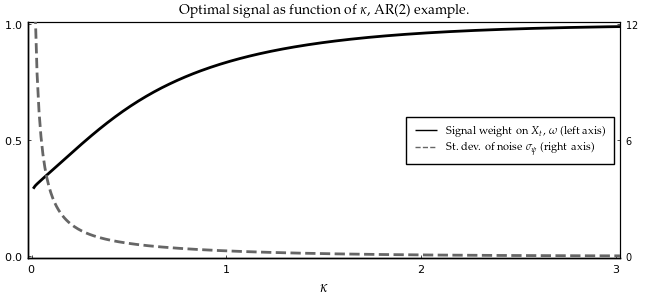

In [6]:
a = fill(NaN, n_κ, 1)

plot(κ_seq,[ω_sol[:,1] a],
    xlabel      = L"$\kappa$",
    label       = [L"Signal weight on $X_{t}$, $\omega$ (left axis)" L"St. dev. of noise  $\sigma_{\psi}$ (right axis)"],
    title       = L"Optimal signal as function of $\kappa$, AR(2) example.",
    linestyle   = [:solid :dash], color = [:black :gray40],
    xticks      = (0:1:3),
    xlim        = (-0.02,3.02),
    yticks      = (0:0.5:1),
    ylim        = (-0.01,1.01),
    lw          = 2, grid = :off, legend = :right,
    titlefont   = font(10), legendfont = font(8), tickfont = font(8),
    framestyle  = :box)
plot!(twinx(),κ_seq,σz_sol[:,1],
    linestyle   = :dash, color = :gray40,
    label       = "",
    xlim        = (-0.02,3.02),
    xticks      = false,
    yticks      = (0:6:12),
    ylim        = (-0.12,12.12),
    lw          = 2, tickfont = font(7),
    size        = (650,300),
    grid        = :off, framestyle  = :box)

### Measure Performance
Benchmark the solution for random values of $\phi_2$:

In [7]:
using BenchmarkTools;
@benchmark Drip(κ,β,[0.9-ϕ2 ϕ2; 1.0 0.0],Q,H,fcap = true) setup = (ϕ2 = 0.9*rand())

BenchmarkTools.Trial: 
  memory estimate:  431.52 KiB
  allocs estimate:  4150
  --------------
  minimum time:     214.093 μs (0.00% GC)
  median time:      288.728 μs (0.00% GC)
  mean time:        321.188 μs (11.65% GC)
  maximum time:     16.050 ms (97.58% GC)
  --------------
  samples:          10000
  evals/sample:     1

Benchmark the solution for random values of $κ$:

In [8]:
@benchmark Drip(κ,β,[0.5 0.4; 1.0 0.0],Q,H,fcap = true) setup = (κ = rand())

BenchmarkTools.Trial: 
  memory estimate:  74.66 KiB
  allocs estimate:  729
  --------------
  minimum time:     41.237 μs (0.00% GC)
  median time:      135.851 μs (0.00% GC)
  mean time:        227.236 μs (10.97% GC)
  maximum time:     16.126 ms (96.27% GC)
  --------------
  samples:          10000
  evals/sample:     1

## Ex. 2: AR(3) and ARMA(2,1) Processes

Here, we replicate the AR(3) and ARMA(2,1) examples in Mackowiak, Matejka and Wiederholt (2018).
Using a similar method to the AR(2) case, we can write the law of motion of optimal actions as a state-space form.

### Solve and Meausre Performance

#### The AR(3) Example

Initialize:

In [9]:
β       = 1.0           ;
θ0      = 1.0           ;
κ       = 10.8          ;

ϕ1      = 1.5           ;
ϕ2      = -0.9          ;
ϕ3      = 0.1           ;

A   = [ϕ1 ϕ2 ϕ3 ; 1 0 0 ; 0 1 0] ;
Q   = [θ0 ; 0; 0]   ;
H   = [1  ; 0; 0]   ;

Solve:

In [10]:
ex2a  = Drip(κ,β,A,Q,H;tol=1e-8);

Measure performance for different values of $\kappa$:

In [11]:
@benchmark Drip(κ,β,A,Q,H;tol=1e-8) setup = (κ = 10*rand())

BenchmarkTools.Trial: 
  memory estimate:  147.59 KiB
  allocs estimate:  1044
  --------------
  minimum time:     155.353 μs (0.00% GC)
  median time:      622.000 μs (0.00% GC)
  mean time:        680.100 μs (11.06% GC)
  maximum time:     28.590 ms (96.80% GC)
  --------------
  samples:          7332
  evals/sample:     1

To be consistent with MMW(2018), scale the signal vector so that the weight on the first element is one ($h_1 = 1$):

In [12]:
h1 = 1;
h2 = ex2a.ss.Y[2]/ex2a.ss.Y[1]
h3 = ex2a.ss.Y[3]/ex2a.ss.Y[1]

0.05349220551890679

Print the weights:

In [13]:
s = @sprintf("  h1 = %5.3f, h2 = %5.3f, h3 = %5.3f", h1, h2, h3)  ;
println(s) ;

  h1 = 1.000, h2 = -0.475, h3 = 0.053


Since we scaled the signal vector, we also need to adjust the noise in the signal accordingly:

In [14]:
AdjNoise   = 3.879
AdjPara_ex2a= AdjNoise*ex2a.ss.Y[1]

0.7839654755293674

Calculate IRFs:

In [15]:
irf_ex2a = irfs(ex2a; T=30) ;
xirf_ex2a   = irf_ex2a.x[1,1,:]
xhatirf_ex2a= irf_ex2a.x_hat[1,1,:]

x     = zeros(3,30);
xhat_noise_ex2a = zeros(3,30);

for ii in 1:30
    if ii==1
        xhat_noise_ex2a[:,ii] = ex2a.ss.K;
    else
        xhat_noise_ex2a[:,ii] = A*xhat_noise_ex2a[:,ii-1]+(ex2a.ss.K*ex2a.ss.Y')*(x[:,ii]-A*xhat_noise_ex2a[:,ii-1]);
    end
end
xhat_noise_ex2a = xhat_noise_ex2a[1,:]*AdjPara_ex2a ;

#### The ARMA(2,1) Example:

Initialize:

In [16]:
β       = 1.0           ;
θ0      = 0.5           ;
θ1      = -0.1          ;
κ       = 1.79          ;

ϕ1      = 1.3           ;
ϕ2      = -0.4          ;

A   = [ϕ1 ϕ2 θ1 ; 1.0 0.0 0.0 ; 0.0 0.0 0.0] ;
Q   = [θ0 ; 0.0; 1.0]   ;
H   = [1.0; 0.0; 0.0]   ;

Solve:

In [17]:
ex2b = Drip(κ,β,A,Q,H,tol=1e-8);

Measure performance for different values of $\kappa$:

In [18]:
@benchmark Drip(κ,β,A,Q,H;tol=1e-8) setup = (κ = 2*rand())

BenchmarkTools.Trial: 
  memory estimate:  109.88 KiB
  allocs estimate:  777
  --------------
  minimum time:     150.033 μs (0.00% GC)
  median time:      441.626 μs (0.00% GC)
  mean time:        479.742 μs (9.89% GC)
  maximum time:     28.593 ms (98.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

To be consistent with MMW(2018), scale the signal vector so that the weight on the first element is one ($h_1 = 1$):

In [19]:
h1 = 1;
h2 = ex2b.ss.Y[2]/ex2b.ss.Y[1]
h3 = ex2b.ss.Y[3]/ex2b.ss.Y[1]

-0.0687478067895003

Print the weights:

In [20]:
s = @sprintf("  h1 = %5.3f, h2 = %5.3f, h3 = %5.3f", h1, h2, h3)  ;
println(s) ;

  h1 = 1.000, h2 = -0.275, h3 = -0.069


Since we scaled the signal vector, we also need to adjust the noise in the signal accordingly:

In [21]:
AdjNoise    = 1.349
AdjPara_ex2b= AdjNoise*ex2b.ss.Y[1]

0.3828466148956306

Calculate the IRFs

In [22]:
irf_ex2b     = irfs(ex2b; T=30) ;
xirf_ex2b    = irf_ex2b.x[1,1,:]
xhatirf_ex2b = irf_ex2b.x_hat[1,1,:]

x     = zeros(3,30);
xhat_noise_ex2b = zeros(3,30);

for ii in 1:30
    if ii==1
        xhat_noise_ex2b[:,ii] = ex2b.ss.K;
    else
        xhat_noise_ex2b[:,ii] = A*xhat_noise_ex2b[:,ii-1]+(ex2b.ss.K*ex2b.ss.Y')*(x[:,ii]-A*xhat_noise_ex2b[:,ii-1]);
    end
end
xhat_noise_ex2b = xhat_noise_ex2b[1,:]*AdjPara_ex2b ;

### Replication of Figure (5)

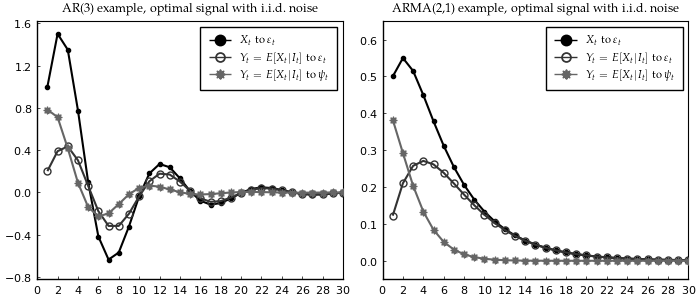

In [23]:
p1 = plot(1:30,[xirf_ex2a xhatirf_ex2a xhat_noise_ex2a],
    title       = "AR(3) example, optimal signal with i.i.d. noise",
    color             = [:black :gray20 :gray40], markerstrokecolor = [:black :gray20 :gray40],
    yticks      = (-0.8:0.4:1.6),
    ylim        = (-0.82,1.62))
p2 = plot(1:30,[xirf_ex2b xhatirf_ex2b xhat_noise_ex2b],
    title       = "ARMA(2,1) example, optimal signal with i.i.d. noise",
    color       = [:black :gray20 :gray40], markerstrokecolor = [:black :gray20 :gray40],
    yticks      = (0:0.1:0.6),
    ylim        = (-0.05,0.65))
Plots.plot(p1,p2,
    layout      = (1,2),
    label       = [L"$X_{t}$ to $\varepsilon_t$" L"$Y_t=E[X_t|I_t]$ to $\varepsilon_t$" L"$Y_t=E[X_t|I_t]$ to $\psi_t$"],
    marker      = [:circle :circle :star8], markercolor = [:black :false :gray40], markersize  = [3 5 5],
    legend      = :topright,
    xticks      = (0:2:30),
    xlim        = (0,30),
    lw          = 1.5,
    legendfont  = font(8), guidefont=font(9), titlefont=font(9), tickfont=font(8),
    size        = (700,300),
    grid        = :off, framestyle = :box)

## Ex. 3: Price-setting with Rational Inattention

We now replicate the price-setting exercise in MMW (2018) and its comparison with the Woodford (2002) example. This corresponds to Figure (6) in their paper.
The model structure is identifcal to our [Example 1](https://github.com/afrouzi/DRIPs.jl/blob/master/examples/notebooks/ex1_pricing_pe_nofeedback.ipynb) (without strategic complementarity) and [Example 2](https://github.com/afrouzi/DRIPs.jl/blob/master/examples/notebooks/ex2_pricing_pe_with_feedback.ipynb) (with strategic complementarity).

### The Case with No Strategic Complementarity

Initialize:

In [24]:
ρ   = 0.9;        #persistence of money growth
σ_u = 0.1;          #std. deviation of shocks to money growth

Primitives of the DRIP:

In [25]:
κ   = 0.62;
β   = 1.0;
A   = [1 ρ; 0 ρ];
Q   = σ_u*[1; 1];
H   = [1; 0];
ω   = 0.1

0.1

Solve:

In [26]:
ex_opt   = Drip(κ,β,A,Q,H,fcap=true);
capa_opt = DRIPs.capacity(ex_opt) #returns capacity utilized in bits

0.6196339094366835

Measure performance for different values of $\kappa$:

In [27]:
@benchmark Drip(κ,β,A,Q,H,fcap=true) setup = (κ = 2*rand())

BenchmarkTools.Trial: 
  memory estimate:  206.02 KiB
  allocs estimate:  1988
  --------------
  minimum time:     106.671 μs (0.00% GC)
  median time:      242.947 μs (0.00% GC)
  mean time:        442.516 μs (11.83% GC)
  maximum time:     38.122 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

Calculate IRFs:

In [28]:
irfs_ex_opt = irfs(ex_opt, T = 12);
output_opt  = (irfs_ex_opt.x[1,1,:] - irfs_ex_opt.a[1,1,:]) ;
output_opt  = [0;output_opt] ;

Now, to compare with Woodford (2002), assume that firms observe a noisy signal, $S_t = q_t + \zeta_t$ where $\zeta_t$ is an idiosyncratic noise. We first define a function to solve the corresponding Kalman filtering problem.

In [29]:
function K_filtering(A,Q,Ysignal,Σz,Σ0 ; maxit=10000,tol=1e-10,w=1)
    err = 1
    iter = 0
    while (err > tol) & (iter < maxit)
        global Knew = Σ0*Ysignal*inv(Ysignal'*Σ0*Ysignal .+ Σz)
        global Σp_temp = Σ0 - Knew*Ysignal'*Σ0
        global Σ1 = A*Σp_temp*A' + Q*Q'

        err     = norm(Σ1 - Σ0,2)/norm(Σ0,2)
        Σ0 = w*Σ1 + (1-w)*Σ0

        #println("Iteration $iter. Difference: $err")
        iter += 1
    end

    return(Knew,Σ0,Σp_temp)
end;

Now find the capacity utilized under Woodford’s formulation such that it yields the same information flow as the optimal signal under ratinoal inattention.

In [30]:
Ywoodford = [1;0]
Σ1_init = ex_opt.ss.Σ_1

Σz_new_b  = 0.01
Σz_new_u  = 0.1
Σz_new    = (Σz_new_b+Σz_new_u)/2
for i in 1:10000
    (Knew,Σ1_new,Σp_temp) = K_filtering(A,Q,Ywoodford,Σz_new,Σ1_init;w=0.5)
    capa_woodford = 0.5*log(det(Σ1_new)/det(Σp_temp))/log(2)

    if capa_woodford > capa_opt
        global Σz_new_b  = Σz_new
    else
        global Σz_new_u  = Σz_new
    end
    global Σz_new    = (Σz_new_b+Σz_new_u)/2
    err = abs(capa_woodford - capa_opt)
    if err < 1e-5
        break
    end
end

Calculate impulse responses under Woodford's formulation

In [31]:
e_k = 1;
x   = zeros(2,12);
xhat= zeros(2,12);
a   = zeros(2,12);

for ii in 1:12
    if ii==1
        x[:,ii]     = Q*e_k;
        xhat[:,ii]  = (Knew*Ywoodford')*(x[:,ii]);
    else
        x[:,ii]     = A*x[:,ii-1];
        xhat[:,ii]  = A*xhat[:,ii-1]+(Knew*Ywoodford')*(x[:,ii]-A*xhat[:,ii-1]);
    end
    a[:,ii]  .= H'*xhat[:,ii];
end

output_woodford  = (x[1,:] - a[1,:]) ;
output_woodford  = [0;output_woodford] ;

Before plotting the IRFs, we also solve the case with strategic complementarity.

### The Case with Strategic Complementarity

We now turn to the example with strategic complementarity.
As in our [Example 2](https://github.com/afrouzi/DRIPs.jl/blob/master/examples/notebooks/ex2_pricing_pe_with_feedback.ipynb), we first define a function to solve the fixed point with endogenous feedback.

In [32]:
function ge_drip(ω,β,A,Q,          #primitives of drip except for H because H is endogenous
                 α,                #strategic complementarity
                 Hq,               #state space rep. of Δq
                 L;                #length of truncation
                 H0       = Hq,    #optional: initial guess for H (Hq is the true solution when α=0)
                 maxit    = 200,   #optional: max number of iterations for GE code
                 tol      = 1e-4)  #optional: tolerance for iterations
    err   = 1;
    iter  = 0;
    M     = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)];
    while (err > tol) & (iter < maxit)
        if iter == 0
            global ge  = Drip(ω,β,A,Q,H0; w=0.9);
        else
            global ge  = Drip(ω,β,A,Q,H0; Ω0=ge.ss.Ω, Σ0=ge.ss.Σ_1, maxit=100);
        end

        XFUN(jj) = ((I-ge.ss.K*ge.ss.Y')*ge.A)^jj * (ge.ss.K*ge.ss.Y') * (M')^jj
        X = DRIPs.infinitesum(XFUN; maxit=L, start = 0);  #E[x⃗]=X×x⃗

        XpFUN(jj) = α^jj * X^(jj)
        Xp = DRIPs.infinitesum(XpFUN; maxit=L, start = 0);

        H1 = (1-α)*Xp'*Hq;
        err= 0.5*norm(H1-H0,2)/norm(H0)+0.5*err;
        H0 = H1;

        iter += 1;
        if iter == maxit
            print("GE loop hit maxit\n")
        elseif mod(iter,10) == 0
            println("Iteration $iter. Difference: $err")
        end

    end
    print(" Iteration Done.\n")
    return(ge)
end;

Now, we solve for the optimal signal structure under rational inattention.

Initialize:

In [33]:
ρ   = 0.9;        #persistence of money growth
σ_u = 0.1;        #std. deviation of shocks to money growth
α   = 0.85;        #degree of strategic complementarity
L   = 40;         #length of truncation
Hq  = ρ.^(0:L-1); #state-space rep. of Δq

ω   = 0.08;
β   = 1 ;
A   = [1 zeros(1,L-2) 0; Matrix(I,L-1,L-1) zeros(L-1,1)];
M   = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)]; # shift matrix
Q   = [σ_u; zeros(L-1,1)];

Solve:

In [34]:
ex_ge   = ge_drip(ω,β,A,Q,α,Hq,L) ;

Iteration 10. Difference: 0.0019552334926346503
 Iteration Done.


Print capacity utilized in with strategic complementarity:

In [35]:
capa_ge = DRIPs.capacity(ge)

0.5830085573346633

Measure performance for random values of ω

In [36]:
using Suppressor
@suppress @benchmark ge_drip(ω,β,A,Q,α,Hq,L) setup = (ω = 0.1*rand())

BenchmarkTools.Trial: 
  memory estimate:  349.28 MiB
  allocs estimate:  43572
  --------------
  minimum time:     273.563 ms (1.90% GC)
  median time:      281.564 ms (3.68% GC)
  mean time:        283.873 ms (3.45% GC)
  maximum time:     303.029 ms (3.42% GC)
  --------------
  samples:          18
  evals/sample:     1

Calculate IRFs

In [37]:
geirfs  = irfs(ex_ge,T = L) ;

dq = diagm(Hq)*geirfs.x[1,1,:];
q  = inv(I-M)*dq ;
output_ge_opt  = q - geirfs.a[1,1,:] ;
output_ge_opt  = [0;output_ge_opt] ;

Finally, to compare with the IRFs under Woodford (2002)’s specification, we find signal noise such that it yields the same information flow as the optimal signal structure.

In [38]:
Ywoodford_ge = Hq
Σ1_init  = ex_ge.ss.Σ_1

Σz_new_b = 0.05
Σz_new_u = 0.12
Σz_new   = (Σz_new_b+Σz_new_u)/2

for i in 1:10000
    (Knew,Σ1_new,Σp_temp) = K_filtering(A,Q,Ywoodford_ge,Σz_new,Σ1_init;w=0.5)
    capa_woodford = 0.5*log(det(Σ1_new)/det(Σp_temp))/log(2)

    if capa_woodford > capa_ge
        global Σz_new_b  = Σz_new
    else
        global Σz_new_u  = Σz_new
    end
    global Σz_new    = (Σz_new_b+Σz_new_u)/2
    err = abs(capa_woodford - capa_ge)
    if err < 1e-5
        break
    end
end

XFUN(jj) = ((I-Knew*Ywoodford_ge')*A)^jj * (Knew*Ywoodford_ge') * (M')^jj
X = DRIPs.infinitesum(XFUN; maxit=L, start = 0);  #E[x⃗]=X×x⃗

XpFUN(jj) = α^jj * X^(jj)
Xp = DRIPs.infinitesum(XpFUN; maxit=L, start = 0);

H1 = (1-α)*Xp'*Hq;

Calculate impurse responses under Woodford's signal

In [39]:
e_k = 1;
x   = zeros(40,40);
xhat= zeros(40,40);
a   = zeros(1,40);

for ii in 1:40
    if ii==1
        x[:,ii]     = Q*e_k;
        xhat[:,ii]  = (Knew*Ywoodford_ge')*(x[:,ii]);
    else
        x[:,ii]     = A*x[:,ii-1];
        xhat[:,ii]  = A*xhat[:,ii-1]+(Knew*Ywoodford_ge')*(x[:,ii]-A*xhat[:,ii-1]);
    end
    a[:,ii]  .= H1'*xhat[:,ii];
end
dq = diagm(Hq)*x[1,:];
q  = inv(I-M)*dq ;
output_ge_woodford  = q - a[1,:] ;
output_ge_woodford = [0;output_ge_woodford] ;

We now have all the IRFs to replicate Figure (6)

### Replication of Figure (6)

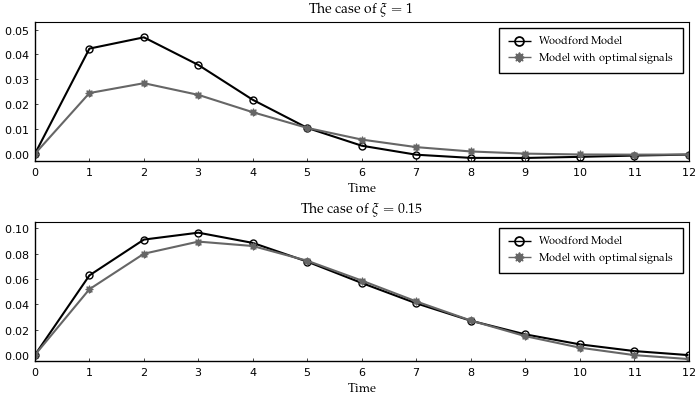

In [40]:
p1 = plot(0:12,[output_woodford output_opt],
    title       = L"The case of $\xi=1$",
    color       = [:black :gray40], markerstrokecolor = [:black :gray40],
    ylim        = (-0.003,0.053),
    ytick       = (0:0.01:0.05))
p2 = plot(0:12,[output_ge_woodford[1:13] output_ge_opt[1:13]],
    title       = L"The case of $\xi=0.15$",
    color       = [:black :gray40], markerstrokecolor = [:black :gray40],
    ylim        = (-0.005,0.105),
    ytick       = (0:0.02:0.1))
Plots.plot(p1,p2,
    layout      = (2,1),
    label       = ["Woodford Model" "Model with optimal signals"],
    legend      = :topright,
    marker      = [:circle :star8], markersize = [5 5], markercolor = [:false :gray40],
    xlim        = (0,12),
    xtick       = (0:1:12),
    xlabel      = "Time",
    lw          = 1.5,
    legendfont  = font(8), titlefont = font(10), guidefont = font(9), tickfont = font(8),
    size        = (700,400),
    grid        = :off, framestyle = :box)

## Ex. 4: Business Cycle Model with News Shocks
In this section, we replicate the business cycle model with news shocks in Section 7 in Mackowiak, Matejka and Wiederholt (2018).

### Setup

#### Full-Information
The techonology shock follows AR(1) process:
$$
\begin{aligned}
z_{t} = \rho z_{t-1} + \sigma \varepsilon_{t-k}
\end{aligned}
$$
and the total labor input is:
$$
\begin{aligned}
n_{t} = \int_0^1 n_{i,t} di .
\end{aligned}
$$

Under perfect information, the households chooses the utility-maximizing labor supply, all firms choose the profit-maximizing labor input, and the labor market clearing condition is:
$$
\begin{aligned}
\frac{1-\gamma}{\psi + \gamma}w_{t} = \frac{1}{\alpha}(z_t - w_t).
\end{aligned}
$$
Then, the market clearing wages and the equilibrium labor input are:
$$
\begin{aligned}
    w_{t} & = \frac{\frac{1}{\alpha}}{\frac{1-\gamma}{\psi+\gamma} + \frac{1}{\alpha}} z_t \equiv \xi z_t \\
    n_t & = \frac{1}{\alpha}(1-\xi) z_t.
\end{aligned}
$$


#### Rational Inattention

Firms wants to keep track of their ideal price,
$$
\begin{aligned}
    n_{t}^* = \frac{1}{\alpha} z_t - \frac{1}{\alpha} \frac{\psi + \gamma}{1 - \gamma} n_t
\end{aligned}
$$
where $n_{t} = \int_0^1 n_{i,t} di$. Then, firm $i$'s choice depends on its information set at time $t$:
$$
\begin{aligned}
    n_{i,t} = E_{i,t} [n_{t}^*].
\end{aligned}
$$

Note that now the state space representation for $n_{t}^*$ is determined in the equilibrium. However, we know that this is a Guassian process and by Wold's theorem we can decompose it to its $MA(\infty)$ representation:
$$
\begin{aligned}
    n_{t}^*=\Phi(L)\varepsilon_t
\end{aligned}
$$
where $\Phi(.)$ is a lag polynomial and $\varepsilon_t$ is the shock to technology. Here, we have basically guessed that the process for $p_{i,t}^*$ is determined uniquely by the history of monetary shocks which requires that rational inattention errors of firms are orthogonal (See [Afrouzi (2020)](http://www.afrouzi.com/strategic_inattetion.pdf)). Our objective is to find $\Phi(.)$.

Now, as in our [Example 2](https://github.com/afrouzi/DRIPs.jl/blob/master/examples/notebooks/ex2_pricing_pe_with_feedback.ipynb), we can represent the problem in a matrix notation.

### Initialization

In [41]:
β   = 1     ;   # Time preference
γ   = 1/3   ;   # Inverse of intertemporal elasticity of substitution
ψ   = 0     ;   # Inverse of Frisch elasticity
α   = 3/4   ;   # Labor share in production function
θ   = -1/α*(ψ+γ)/(1-γ)  ;
ξ   = θ/(θ-1)   ;

ρ   = 0.9   ;   #persistence of technology shocks
σ   = 1     ;   #std. deviation of technology shocks
ω   = 6.5   ;   # Information cost

L   = 40    ;   #length of truncation
k   = 8     ;   #news horizon

M   = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)]; # shift matrix
Hz  = ρ.^(0:L-1)
Hz = (M^k)*Hz

A   = M     ;
Q   = [σ; zeros(L-1,1)] ;

Also, define a function that solves the GE problem and returns the solution in a `Drip` structure:

In [42]:
function ge_drip(ω,β,A,Q,          #primitives of drip except for H because H is endogenous
                 α,                #strategic complementarity
                 θ,
                 Hz,               #state space rep. of z
                 L;                #length of truncation
                 w_out    = 0.5,    #optional: initial guess for H (Hq is the true solution when α=0)
                 H0       = Hz,    #optional: initial guess for H (Hq is the true solution when α=0)
                 maxit    = 200,   #optional: max number of iterations for GE code
                 tol      = 1e-6)  #optional: tolerance for iterations
    err   = 1;
    iter  = 0;
    M     = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)];
    eye   = Matrix(I,L,L)
    while (err > tol) & (iter < maxit)
        if iter == 0
            global ge  = Drip(ω,β,A,Q,H0;w=0.5, tol=1e-8);
        else
            global ge  = Drip(ω,β,A,Q,H0;w=0.9, tol=1e-8, Ω0=ge.ss.Ω, Σ0=ge.ss.Σ_1, maxit=1000);
        end

        XFUN(jj) = ((eye-ge.ss.K*ge.ss.Y')*ge.A)^jj * (ge.ss.K*ge.ss.Y') * (M')^jj
        X = DRIPs.infinitesum(XFUN; maxit=L, start = 0);  #E[x⃗]=X×x⃗

        H1 = (1/α)*Hz + θ*X'*H0 ;

        err= 0.5*norm(H1-H0,2)/norm(H0)+0.5*err;

        H0 = w_out*H1 + (1.0-w_out)*H0 ;

        iter += 1;
        if iter == maxit
            print("GE loop hit maxit\n")
        elseif mod(iter,10) == 0
            println("Iteration $iter. Difference: $err")
        end

    end
    print(" Iteration Done.\n")
    return(ge)
end;

### Solve and Measure Performance

Solve:

In [43]:
ge      = ge_drip(ω,β,A,Q,α,θ,Hz,L)  ;

Iteration 10. Difference: 0.008423206111917462
Iteration 20. Difference: 1.1340049707814608e-5
 Iteration Done.


Measure performance by solving the model for different values of ω:

In [44]:
@suppress @benchmark ge_drip(ω,β,A,Q,α,θ,Hz,L) setup = (ω = 6.5*rand())

BenchmarkTools.Trial: 
  memory estimate:  573.41 MiB
  allocs estimate:  78643
  --------------
  minimum time:     546.028 ms (2.93% GC)
  median time:      642.400 ms (2.49% GC)
  mean time:        636.123 ms (2.83% GC)
  maximum time:     666.456 ms (2.39% GC)
  --------------
  samples:          8
  evals/sample:     1

Calculate IRFs and profit loss:

In [45]:
geirfs  = irfs(ge,T = L)         ;
profit_loss = sum((geirfs.x[1,1,:]/100 - geirfs.x_hat[1,1,:]/100).^2) ;

s = @sprintf("==: Profit loss from rational inattention = %6.5f", profit_loss)  ;
println(s) ;

==: Profit loss from rational inattention = 0.00010


### Replication of Figure (7)

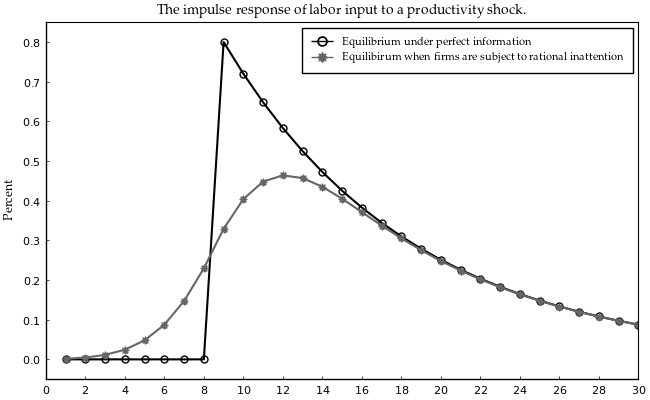

In [46]:
n_opt   = geirfs.a[1,1,:]   ; # Optimal labor input under rational inattention
n_fullinfo = σ*1/α*(1-ξ)*Hz ; # Optimal labor input under full information


plot(1:30,[n_fullinfo[1:30] n_opt[1:30]],
    title       = "The impulse response of labor input to a productivity shock.",
    ylabel      = "Percent",
    label       = ["Equilibrium under perfect information" "Equilibirum when firms are subject to rational inattention"],
    legend      = :topright,
    color       = [:black :gray40], markerstrokecolor = [:black :gray40],
    marker      = [:circle :star8], markercolor = [:false :gray40], markersize = [5 5],
    ylim        = (-0.05,0.85),
    ytick       = (0:0.1:0.8),
    xlim        = (0,30),
    xtick       = (0:2:30),
    lw          = 1.5,
    legendfont  = font(8), titlefont = font(10), tickfont = font(8), guidefont = font(9),
    size        = (650,400),
    grid        = :off, framestyle = :box)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*